Признак alcohol имеет значимасть 0.044057028304252885
Признак malic_acid имеет значимасть 0.0039030732455709936
Признак ash имеет значимасть 0.0019135781708135686
Признак alcalinity_of_ash имеет значимасть 0.0038485298293263214
Признак magnesium имеет значимасть 0.004837560558982336
Признак total_phenols имеет значимасть 0.00030553214249591824
Признак flavanoids имеет значимасть 0.4584311614998617
Признак nonflavanoid_phenols имеет значимасть 0.0009382326422557927
Признак proanthocyanins имеет значимасть 0.002257584472544397
Признак color_intensity имеет значимасть 0.10005006579264719
Признак hue имеет значимасть 0.029225221205189656
Признак od280/od315_of_diluted_wines имеет значимасть 0.13800749079679708
Признак proline имеет значимасть 0.2122249413392621
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 

battery_power    5.748920e-173
blue              8.879499e-01
clock_speed       1.713385e-01
dual_sim          1.003719e-01
fc                6.660196e-01
four_g            9.336736e-01
int_memory        2.952510e-02
m_dep             6.896093e-01
mobile_wt         1.531247e-05
n_cores           5.629444e-01
pc                9.338863e-01
px_height         4.419902e-46
px_width          5.394599e-45
ram               0.000000e+00
sc_h              5.651364e-01
sc_w              8.638664e-01
talk_time         7.827102e-01
three_g           1.933912e-01
touch_screen      6.913995e-01
wifi              1.366888e-01
dtype: float64

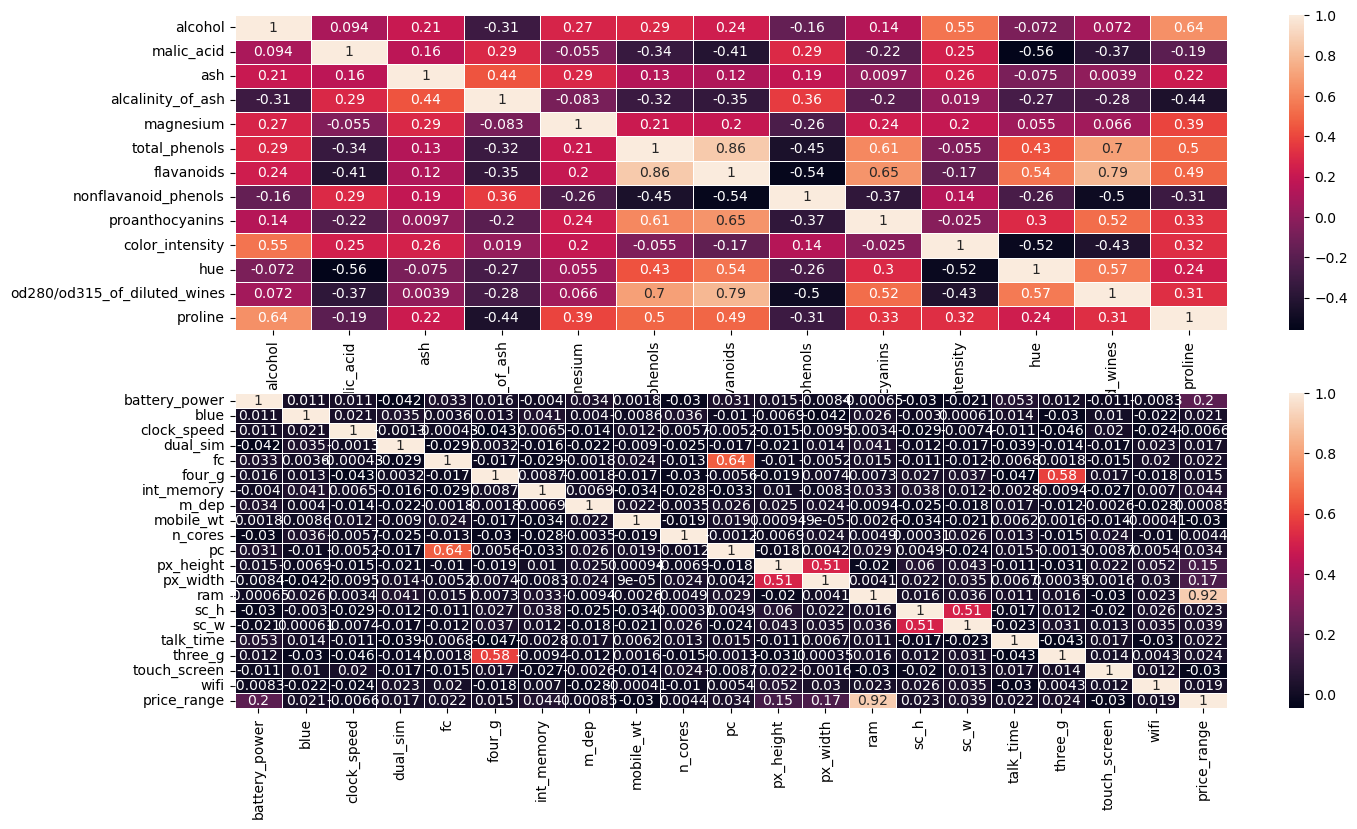

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.feature_selection  import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
wine=load_wine()
wine_df=pd.DataFrame(data=wine.data, columns=wine.feature_names)
correlation=wine_df.corr()
correlation
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(16,9))
sns.heatmap(correlation,annot=True,linewidth=.5,ax=ax1)
wine
#2
x=wine.data
y=wine.target
model = RandomForestRegressor()
model.fit(x,y)
importances = model.feature_importances_
for i, importance in enumerate(importances):
    print(f"Признак {wine.feature_names[i]} имеет значимасть {importance}")
#3
california = fetch_california_housing()
california
california_df=pd.DataFrame(data=california.data, columns=california.feature_names)
TARGET=california.target
california_df.info()
california_df_copy = sm.add_constant(california_df)
model=sm.OLS(TARGET, california_df_copy).fit()
p_values = model.pvalues[1:]
alpha=0.05
selected_features=p_values[p_values<alpha].index
print(selected_features)

#4
X = california.data
k = california.target
# Вычисление взаимной информации для каждого признака
mi = mutual_info_regression(X, k)
df = pd.DataFrame({'feature': california.feature_names, 'mutual_info': mi})
df=df.sort_values(by="mutual_info", ascending=False)
print(df)

#5
Z = california.data
q = california.target
model_5=LinearRegression()
rfe=RFE(model_5, n_features_to_select=4)
rfe_fit=rfe.fit_transform(Z,q)
model_5.fit(rfe_fit, q)
selected_features=[california.feature_names[i] for i in range(len(rfe.support_)) if rfe.support_[i]]
ranking=list(rfe.ranking_)
#ranking.sort(reverse=True)
print(california.feature_names, ranking, selected_features, sep="\n")


#6
mobile_df=pd.read_csv("D:/IDA/mobile_praces/train.csv")
#mobile_df_test=pd.read_csv("D:/IDA/mobile_praces/test.csv")
correl=mobile_df.corr()

sns.heatmap(correl,annot=True,ax=ax2,linewidth=.5)

x=mobile_df.drop("price_range", axis=1)
y=mobile_df["price_range"]
model = RandomForestRegressor()
model.fit(x,y)
importances = model.feature_importances_
for i, importance in enumerate(importances):
    print(f"Признак {mobile_df.columns[i]} имеет значимасть {importance}")
    
TARGET=mobile_df["price_range"]
mobile_df_copy=mobile_df.drop("price_range", axis=1)
mobile_df_copy = sm.add_constant(mobile_df_copy)
model=sm.OLS(TARGET, mobile_df_copy).fit()
p_values = model.pvalues[1:]
alpha=0.05
selected_features=p_values[p_values<alpha].index
print(selected_features)

P=mobile_df.drop("price_range", axis=1)
t=mobile_df["price_range"]
# Вычисление взаимной информации для каждого признака
mi_6 = mutual_info_regression(P, t)
df_6 = pd.DataFrame({'feature': P.columns, 'mutual_info': mi_6})
df_6=df_6.sort_values(by="mutual_info", ascending=False)
df_6

D = mobile_df.drop("price_range", axis=1)
g = mobile_df["price_range"]
model_6=LinearRegression()
rfe_6=RFE(model_6, n_features_to_select=5)
rfe_fit_6=rfe_6.fit_transform(D,g)
model_6.fit(rfe_fit_6, g)
selected_features=[D.columns[i] for i in range(len(rfe_6.support_)) if rfe_6.support_[i]]
ranking=list(rfe_6.ranking_)
#ranking.sort(reverse=True)
print(D.columns, ranking, selected_features, sep="\n")
wine_df
california_df_copy
p_values